<a href="https://colab.research.google.com/github/junaid786-prog/spam-review-detection/blob/main/spam_review_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Review Detection**

## 1. Installing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

##2. Loading Dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
data_path = '/content/drive/MyDrive/data/spam-reviews.csv'
df = pd.read_csv(data_path, on_bad_lines="skip")
df.head(5)

##3. Cleaning Data

In [ ]:
description = df.describe()
# df.info()
# converting int columns like product_price and rating from datatype obj to int and then removing non-numeric values

df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')


# handling null values
null_rows_sum = df.isnull().sum()
null_rows = df[df['Review'].isnull()]

'''
As all other columns except reviews are not null. Dataset contains 205052 rows and review column is in text
also have important so we can drop it
Same for column Summary
'''

df.dropna(subset=['Review', 'Summary', 'Rate', 'product_price'], inplace=True)
df.isnull().sum()

##4. Analyzing & Visualizing Data

There are two main types of columns here. Product prices and Rates are numerical values and others are strings
So for numerical we are going to plot histograph
And for string

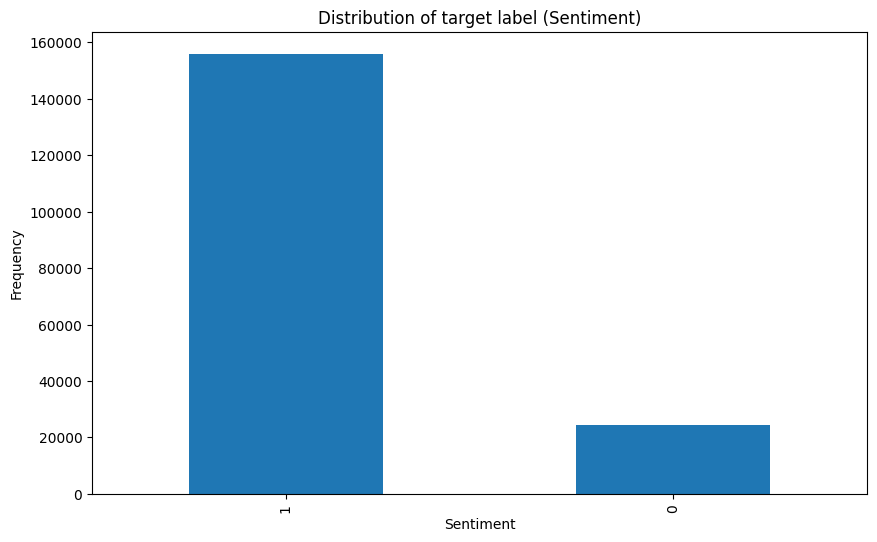

In [107]:
# For target variable sentiment
label_counts = df['Sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of target label (Sentiment)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

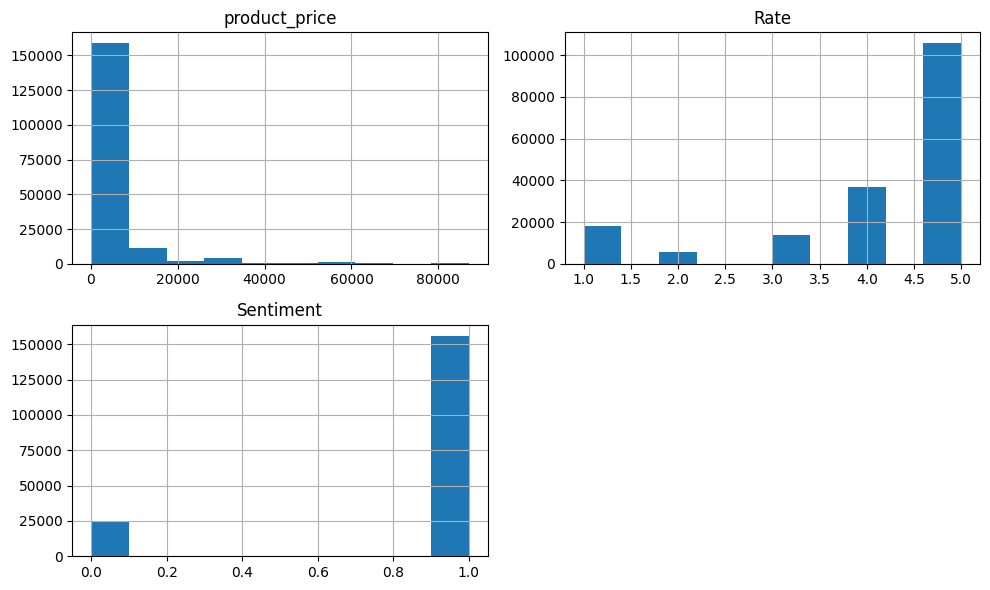

In [108]:
# Plot a histogram of numerical columns
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

<ipython-input-109-8cebe8d282fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


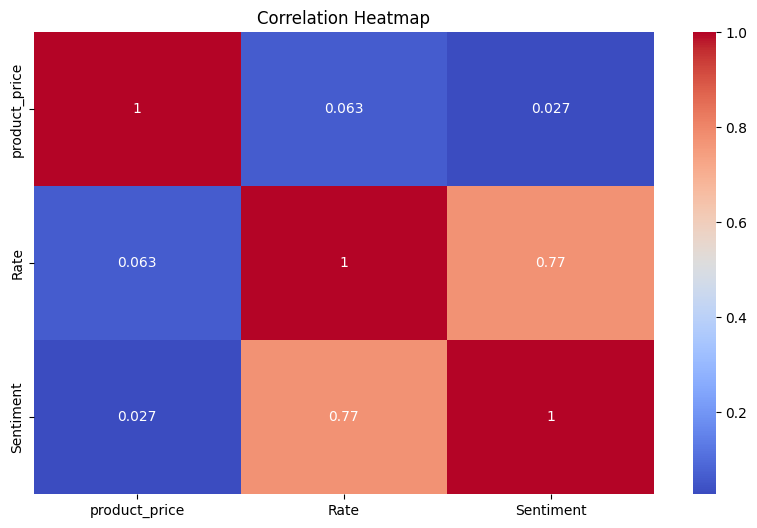

In [109]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5. Tokenization of text columns
As in reviews and summary like columns there are text values so for further working we have to convert into numerical values (tokenization)

In [ ]:
# converting target categorized variable to number 1 for positive, neutral and 0 for negative
df['Sentiment'] = df['Sentiment'].replace({'positive': 1, 'neutral': 1, 'negative': 0})

In [ ]:
nltk.download('punkt')

# Tokenize the 'review' column
df['review_tokens'] = df['Review'].apply(nltk.word_tokenize)

# Tokenize the 'summary' column
df['summary_tokens'] = df['Summary'].apply(nltk.word_tokenize)

# Print the tokenized columns
print(df[['review_tokens', 'summary_tokens']])

##6.Splitting dataset

In [ ]:
df_to_pass = df[['summary_tokens', 'product_price', 'Rate']]
X_train, X_test, Y_train, Y_test = train_test_split(df_to_pass, df["Sentiment"], test_size = 0.2, random_state=42)

###converting into numerics

In [ ]:
#Convert the list of tokens into a string for each document
text_data_train = [' '.join(tokens) for tokens in X_train['summary_tokens']]
text_data_test = [' '.join(tokens) for tokens in X_test['summary_tokens']]

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(text_data_train)
X_test_tfidf = vectorizer.transform(text_data_test)

# Print the shape and example values of X_train_tfidf
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("Example values of X_train_tfidf:")
# print(X_train_tfidf.toarray()[:3])  # Print the TF-IDF values of the first three samples

# # Verify the vocabulary size
# print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
# vectorizer.get_feature_names_out()

## 7. Training Models

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
L_classifier = LogisticRegression(max_iter=100000000)
L_classifier.fit(X_train_tfidf, Y_train)
predictions = L_classifier.predict(X_test_tfidf)
a = accuracy_score(Y_test, predictions)
print("Accuracy:", a)

Accuracy: 0.9540691872713161


### Support Vector Machine

In [ ]:
svc_classifier = SVC()

# Fit the model to the training data
svc_classifier.fit(X_train_tfidf, Y_train)
predictions = svc_classifier.predict(X_test_tfidf)

# Print the predictions
print("Predictions:", predictions)

### Naive Buyes

In [94]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
naive_classifier = MultinomialNB()

# Fit the model to the training data
naive_classifier.fit(X_train_tfidf, Y_train)
predictions = naive_classifier.predict(X_test_tfidf)
a = accuracy_score(Y_test, predictions)
print("Accuracy:", a)

Accuracy: 0.9048120634216654


###K Nearest Neighbours (KNN)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_classifier.fit(X_train_tfidf, Y_train)
predictions = knn_classifier.predict(X_test_tfidf)
a = accuracy_score(Y_test, predictions)
print("Accuracy:", a)

Accuracy: 0.9229404590309347


### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree classifier
decision_classifier = DecisionTreeClassifier()

# Fit the model to the training data
decision_classifier.fit(X_train_tfidf, Y_train)
predictions = decision_classifier.predict(X_test_tfidf)
a = accuracy_score(Y_test, predictions)
print("Accuracy:", a)

Accuracy: 0.9501053331854973


## 8. Testing Model

Predictions: [1 0 1 ... 1 1 1]


In [98]:
def make_prediction(user_input, classifier):
  user_tokens = nltk.word_tokenize(user_input)
  # Convert the list of tokens into a string
  text_data_sample = ' '.join(user_tokens)
  # Convert the sample text data to numerical features using TF-ID
  sample_tfidf = vectorizer.transform([text_data_sample])
  # Make a prediction on the sample
  prediction = classifier.predict(sample_tfidf)
  # Print the predicted label
  if (prediction[0] == 0):
    print("this review is marked as negative")
  else:
    print("this review is marked as positive")

In [106]:
make_prediction("should not buy it", decision_classifier)

this review is marked as spam
